# Class Exercise for November 2nd, 2021

## Problem 1: Sum the numbers (positive and negatives) in a string

In [17]:
import re

In [18]:
def extract_numbers(input):
    return re.findall("-{0,1}\d+", input)

def get_sums(input):
    numbers = extract_numbers(input)
    print(f'Extracted numbers: {numbers}')
    positive_sum = 0
    negative_sum = 0
    for strn in numbers:
        n = int(strn)
        if n >= 0:
            positive_sum = positive_sum + n
        else:
            negative_sum = negative_sum + n
    print(f'Positive values: {positive_sum}')
    print(f'Negative values: {negative_sum}')
    

In [19]:
sample_input = "-100@^sdfkj8902w3ir021@swf-20"

In [20]:
get_sums(sample_input)

Extracted numbers: ['-100', '8902', '3', '021', '-20']
Positive values: 8926
Negative values: -120


## Problem 2: Powers of digits

In [51]:
def get_digits(input):
    result = []
    temp = input
    while temp > 0:
        result.append(temp - int(temp / 10) * 10)
        temp = int(temp / 10)
    return result
    
def find_numbers():
    found = 0
    exp = 5
    total = 0
    for n in range(2, 100000):
        digits = get_digits(n)
        sumn = 0
        for digit in digits:
            sumn = sumn + digit**exp
        if sumn == n:
            print(f'found number {n}')
            total = total + n
    print(f'Sum of all the numbers that can be written as the sum of fifth powers of their digits: {total}')


In [52]:
find_numbers()

found number 4150
found number 4151
found number 54748
found number 92727
found number 93084
Sum of all the numbers that can be written as the sum of fifth powers of their digits: 248860


# Class

In [103]:
import pandas as pd
import numpy as np

In [104]:
full_df = pd.read_csv('train.csv')

In [105]:
full_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
989,990,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,197000
1231,1232,90,RL,70.0,7728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2006,WD,Normal,132500
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1362,1363,50,RL,NaN,12513,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,104900
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [106]:
# create datafame with LotArea and Salesprace
df = full_df[['LotArea', 'SalePrice']]

In [107]:
df.sample(5)

,LotArea,SalePrice
760,9100,127500
481,11846,374000
1214,10205,134500
272,11764,290000
498,7800,130000


In [108]:
print(df['LotArea'].quantile(0.10))
print(df['LotArea'].quantile(0.90))

5000.0
14381.70000000001


### ceiling and flooring

In [109]:
# Applies ceiling and flooring to the values using the quartiles
df['LotArea'] = np.where(df['LotArea'] < 5000.0, 5000.0, df['LotArea'])
df['LotArea'] = np.where(df['LotArea'] > 14381.7, 14381.7, df['LotArea'])

<ipython-input-109-510e1381c206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotArea'] = np.where(df['LotArea'] < 5000.0, 5000.0, df['LotArea'])
<ipython-input-109-510e1381c206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotArea'] = np.where(df['LotArea'] > 14381.7, 14381.7, df['LotArea'])


### Trimming

In [110]:
print(df['SalePrice'].quantile(0.10))
print(df['SalePrice'].quantile(0.90))

106475.0
278000.0


In [111]:
df.shape

(1460, 2)

In [112]:
index = df[(df['SalePrice'] > 272800.0)|(df['SalePrice'] < 107500.0)].index
df.drop(index, inplace = True)

C:\tools\Anaconda3\envs\Lambton\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [113]:
df.shape

(1146, 2)

### Log Transformation

In [114]:
df['Log_SalePrice'] = df['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)

<ipython-input-114-f7b2f44385e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_SalePrice'] = df['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)


In [115]:
print(df['SalePrice'].skew())
print(df['Log_SalePrice'].skew())

0.5914378307058675
0.21445584817701227


<AxesSubplot:>

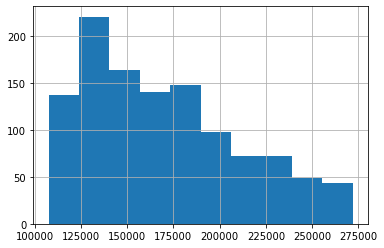

In [116]:
df['SalePrice'].hist()

<AxesSubplot:>

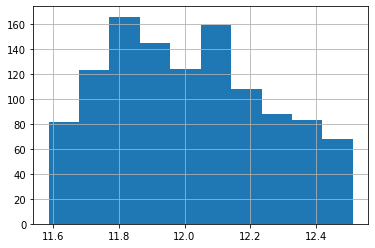

In [117]:
df['Log_SalePrice'].hist()

### Binarizer

In [118]:
from sklearn.preprocessing import Binarizer

In [120]:
age = np.array([[6],[12],[20],[36],[65]])
binarizer = Binarizer(18)
binarizer.fit_transform(age)

C:\tools\Anaconda3\envs\Lambton\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[0],
       [0],
       [1],
       [1],
       [1]])

### Digitize

In [121]:
age = np.array([[6],[12],[20],[36],[65]])
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

### Clustering observations

In [122]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [123]:
clusterer = KMeans(3, random_state=0)

In [124]:
features, _ = make_blobs(n_samples = 50,
                        n_features = 2,
                        centers = 3,
                        random_state = 1)

In [125]:
clusterer.fit(features)

KMeans(n_clusters=3, random_state=0)

In [126]:
dataframe = pd.DataFrame(features , columns= ["feature_1", "feature_2"])

In [127]:
dataframe["group"] = clusterer.predict(features)

In [128]:
dataframe.head(5)

,feature_1,feature_2,group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2
3,-7.440167,-8.791959,2
4,-6.641388,-8.075888,2


### Predicting missing values

In [129]:
from sklearn.impute import KNNImputer

In [133]:
X = np.array([[1,2,np.nan], [3,4,3], [np.nan,6,5], [8,8,7]])
X

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [134]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])